In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install counter

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
!pip install GetOldTweets3

In [6]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import GetOldTweets3  as got # library used to scrape data directly from twitter without any tool
import warnings
warnings.filterwarnings('ignore')

In [7]:
def get_tweets():
    import GetOldTweets3  as got # library used to scrape data directly from twitter without any tool
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('cronavirus')\
          .setSince("2020-02-07") \
          .setUntil("2020-03-07") \
          .setMaxTweets(200)
    #crete the list which contains all the Tweets
    
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
        
    # creating list of choosen tweet data
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets   

In [8]:
# reading text file

text =""
text_tweets=get_tweets()
length = len(text_tweets)

for i in range(0,length):
    text=text_tweets[i][0]+" "+text


In [9]:
len(text_tweets)

200

In [10]:
text_tweets

[['Cybercriminals exploiting concern about coronavirus to steal personal information or defraud them. https://www.newsday.com/business/phishing-emails-cdc-coronavirus-1.42531729 via @JamesTMadore'],
 ['प्रधानमंत्री फसल बीमा योजना किसानों को आपदा से हुए नुकसान से राहत दिलाने वाली योजना है। इसके अंतर्गत न्यूनतम प्रीमियम देकर, किसान बुआई से कटाई तक प्राकृतिक आपदाओं से हुए नुकसान का उचित भुगतान पा सकता है। और जानिए: http://www.pmfby.gov.in #PMKisan #AatmaNirbharKrishi'],
 ["Reminder to those stocking up for the Corona virus . If you have pets don't forget to stock up for them aswell #COVIDー19 #coronavirus #Coronavirusireland"],
 ['Good morning ladies & gentlemen for this bus all man don hear say corona virus don enter Cameroon. I don cam here for tell wuna say make wuna no fear we get the cure, &amp; this cure na weti? My people dem na "African panasia" just take 2 spoon of this morning &amp; evening &amp; u go well '],
 ["Us Ozzy's are a weird bunch some times. To combat the coronavirus w

In [11]:
# converting to lowercase 

lower_case=text.lower()

In [12]:
lower_case

'read the answers to this question. this is @realdonaldtrump and his sham of a presidency covering shit up. i suppose he thinks that if no one is tested no one will know how bad it is. #coronavirus  what a terrible human being @realdonaldtrump is! great way to work together to fight the coronavirus crisis. it is sickening!  joke’s on you, we already bailed on sxsw two weeks ago for reasons entirely unrelated to coronavirus!!! obviously they decided it wasn’t worth doing without us in attendance  todo el mundo deseando que pare el coronavirus, y yo lo que quiero es que pare mi madre de invitar gente a mi boda. the corona virus i mean austin cancelled @sxsw i knew it was getting real ##sxswcancelled ##coronavirus the coronavirus is here so make sure y’all prepare in true kentucky fashion and get the milk &amp; bread dangit avete rotto i cojoni, dovete sta a casa #coronavirus #coronavirusitalia if you drank outta the water fountain in the boys locker room at bayside secondary you are immu

In [13]:
# removing all punctuation
cleaned_text = lower_case.translate(str.maketrans('','', string.punctuation))

# splitting text into words

tokenization_word = word_tokenize(cleaned_text, 'english')

In [14]:
tokenization_word

['read',
 'the',
 'answers',
 'to',
 'this',
 'question',
 'this',
 'is',
 'realdonaldtrump',
 'and',
 'his',
 'sham',
 'of',
 'a',
 'presidency',
 'covering',
 'shit',
 'up',
 'i',
 'suppose',
 'he',
 'thinks',
 'that',
 'if',
 'no',
 'one',
 'is',
 'tested',
 'no',
 'one',
 'will',
 'know',
 'how',
 'bad',
 'it',
 'is',
 'coronavirus',
 'what',
 'a',
 'terrible',
 'human',
 'being',
 'realdonaldtrump',
 'is',
 'great',
 'way',
 'to',
 'work',
 'together',
 'to',
 'fight',
 'the',
 'coronavirus',
 'crisis',
 'it',
 'is',
 'sickening',
 'joke',
 '’',
 's',
 'on',
 'you',
 'we',
 'already',
 'bailed',
 'on',
 'sxsw',
 'two',
 'weeks',
 'ago',
 'for',
 'reasons',
 'entirely',
 'unrelated',
 'to',
 'coronavirus',
 'obviously',
 'they',
 'decided',
 'it',
 'wasn',
 '’',
 't',
 'worth',
 'doing',
 'without',
 'us',
 'in',
 'attendance',
 'todo',
 'el',
 'mundo',
 'deseando',
 'que',
 'pare',
 'el',
 'coronavirus',
 'y',
 'yo',
 'lo',
 'que',
 'quiero',
 'es',
 'que',
 'pare',
 'mi',
 'madre

In [15]:
# removing word from the tockenization words list
final_words =[]
for word in tokenization_word:
    if word not in stopwords.words('english'):
        final_words.append(word)
        

In [16]:
final_words

['read',
 'answers',
 'question',
 'realdonaldtrump',
 'sham',
 'presidency',
 'covering',
 'shit',
 'suppose',
 'thinks',
 'one',
 'tested',
 'one',
 'know',
 'bad',
 'coronavirus',
 'terrible',
 'human',
 'realdonaldtrump',
 'great',
 'way',
 'work',
 'together',
 'fight',
 'coronavirus',
 'crisis',
 'sickening',
 'joke',
 '’',
 'already',
 'bailed',
 'sxsw',
 'two',
 'weeks',
 'ago',
 'reasons',
 'entirely',
 'unrelated',
 'coronavirus',
 'obviously',
 'decided',
 '’',
 'worth',
 'without',
 'us',
 'attendance',
 'todo',
 'el',
 'mundo',
 'deseando',
 'que',
 'pare',
 'el',
 'coronavirus',
 'yo',
 'lo',
 'que',
 'quiero',
 'es',
 'que',
 'pare',
 'mi',
 'madre',
 'de',
 'invitar',
 'gente',
 'mi',
 'boda',
 'corona',
 'virus',
 'mean',
 'austin',
 'cancelled',
 'sxsw',
 'knew',
 'getting',
 'real',
 'sxswcancelled',
 'coronavirus',
 'coronavirus',
 'make',
 'sure',
 '’',
 'prepare',
 'true',
 'kentucky',
 'fashion',
 'get',
 'milk',
 'amp',
 'bread',
 'dangit',
 'avete',
 'rotto',
 

In [17]:
# get emotion Text
# let's create empty emotion_list

emotion_list = []
with open('emotion.txt','r') as file:
    for line in file: # it print all line which is available in file
        clear_line= line.replace('\n', '').replace(',', '').replace("'", '').strip() # first we replace new line by \n and also replace quote with space
        #print(clear_line)
        word,emotion = clear_line.split(':')
       # print('word :' + word +"  " + 'Emotion :'+emotion)
        if word in final_words: # let's check word prsent in final word or not
            emotion_list.append(emotion)
print(emotion_list)
len(emotion_list)

[' attracted', ' safe', ' fearful', ' average', ' attracted', ' hated', ' adequate', ' ecstatic', ' happy', ' hated', ' entitled', ' apathetic', ' lost', ' attached', ' angry', ' attracted', ' sad', ' independent', ' surprise', ' powerless', ' alone', ' happy', ' loved']


23

In [18]:
# let's count how many times particular emotion occurs in emotion_list usig Counter
w = Counter(emotion_list)
print(w)

Counter({' attracted': 3, ' hated': 2, ' happy': 2, ' safe': 1, ' fearful': 1, ' average': 1, ' adequate': 1, ' ecstatic': 1, ' entitled': 1, ' apathetic': 1, ' lost': 1, ' attached': 1, ' angry': 1, ' sad': 1, ' independent': 1, ' surprise': 1, ' powerless': 1, ' alone': 1, ' loved': 1})


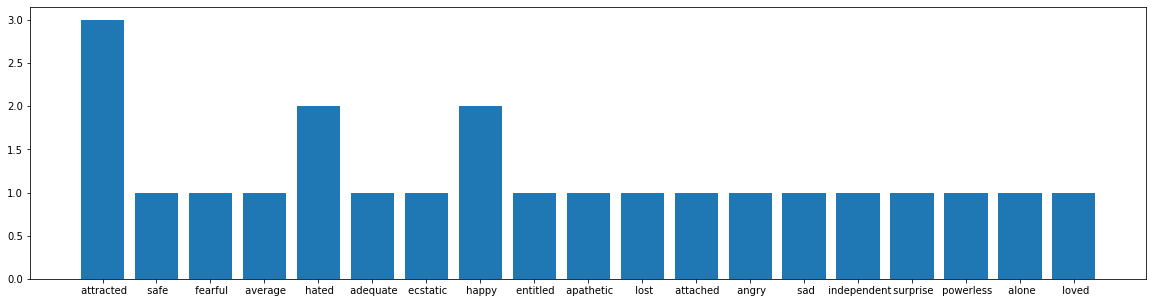

In [19]:
# let's plot eomotion using matplotlib 

plt.figure(figsize=(20,5))
plt.bar(w.keys(),w.values())
plt.savefig('graph.png')
plt.show()

In [37]:
# let's check probality negative vs. positive
def sentiment_analyse(sentiment_text):
    score= SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)

In [38]:
sentiment_analyse(cleaned_text)

{'neg': 0.058, 'neu': 0.87, 'pos': 0.072, 'compound': 0.9969}


In [39]:
# after outbreak of cronavirus an emotion analysis

def get_tweets():
    import GetOldTweets3  as got # library used to scrape data directly from twitter without any tool
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('#cronavirus')\
          .setSince("2020-03-20") \
          .setUntil("2020-04-20") \
          .setMaxTweets(200)
    #crete the list which contains all the Tweets
    
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
        
    # creating list of choosen tweet data
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets   

In [40]:
# reading text file

text =""
text_tweets=get_tweets()
length = len(text_tweets)

for i in range(0,length):
    text=text_tweets[i][0]+" "+text


In [41]:
len(text_tweets)

200

In [42]:
text_tweets

[['January 20, 2020; First confirmed case of #Cronavirus #COVID19 diagnosed in the USA.. April 19, 2020; Confirmed Infections: 755,533 Deaths in USA: 40,461 90 days'],
 ['PMFBY के अंतर्गत केंद्र व राज्य सरकारों ने किसानों के लिए न्यूनतम प्रीमियम का प्रावधान किया है। खरीफ फसलों के लिए 2 प्रतिशत, रबी के लिए 1.5 प्रतिशत तथा हार्टीकल्चर फसलों के लिए यह, बीमा राशि का 5 प्रतिशत है। और जानिए: http://www.pmfby.gov.in #AatmaNirbharKrishi #PMKisan'],
 ['#Uber #Cronavirus ad. Shilling out on TV ads. @Sydney, Australia https://www.instagram.com/p/B_LdiaDhzfB/?igshid=1evlc92fjfwbq'],
 ['This is NEWS worth monitoring, and updates worth looking forward to. #cronavirus #news'],
 ['Looks like corona is no more dangerous, first tweet without mentioning #cronavirus'],
 ['How to beat the #cronavirus #bored #blues reinvent some old fair games. Each balloon has activities inside that they must complete. #noarguments #crazykids #sunnyday https://www.instagram.com/p/B_LXgb-pG6_/?igshid=1oo49wtl1g6yd'],
 ['بلو

In [43]:
lower_case= text.lower()

In [44]:
# removing all punctuation
cleaned_text = lower_case.translate(str.maketrans('','', string.punctuation))

# splitting text into words

tokenization_word = word_tokenize(cleaned_text, 'english')

In [45]:
len(tokenization_word)

4544

In [46]:
# removing word from the tockenization words list
final_words =[]
for word in tokenization_word:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [47]:
len(final_words)

3626

In [48]:
# get emotion Text
# let's create empty emotion_list

emotion_list = []
with open('emotion.txt','r') as file:
    for line in file: # it print all line which is available in file
        clear_line= line.replace('\n', '').replace(',', '').replace("'", '').strip() # first we replace new line by \n and also replace quote with space
        #print(clear_line)
        word,emotion = clear_line.split(':')
       # print('word :' + word +"  " + 'Emotion :'+emotion)
        if word in final_words: # let's check word prsent in final word or not
            emotion_list.append(emotion)
print(emotion_list)
        

[' angry', ' bored', ' free', ' free', ' alone', ' lost', ' happy', ' sad', ' fearful', ' happy', ' belittled']


In [49]:
len(emotion_list)

11

In [51]:
# let's count how many times particular emotion occurs in emotion_list usig Counter
w = Counter(emotion_list)
print(w)

Counter({' free': 2, ' happy': 2, ' angry': 1, ' bored': 1, ' alone': 1, ' lost': 1, ' sad': 1, ' fearful': 1, ' belittled': 1})


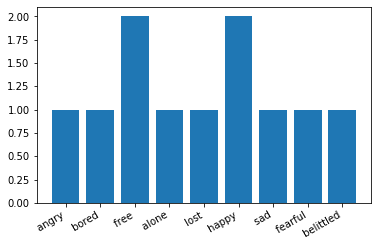

In [52]:
# let's plot graph of emotion
fig, ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graphs.png')
plt.show()

In [53]:
sentiment_analyse(cleaned_text)

{'neg': 0.06, 'neu': 0.861, 'pos': 0.079, 'compound': 0.9984}


In [56]:
def sentiment_analyse(sentiment_text):
    score= SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)

- we can compare both graph  happy sentiment is common in both.
- before cronavirus outbreak people tweet hated and attracted sentiment nut after outbreak of cronavirus no one tweet this.
- after outbreak cronavirus people tweet 